# Lab 03: Resizing and slicing in PyTorch -- exercise

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'pytorch_tensor_part2_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CE7454_2020_codes/codes/labs_lecture02/lab03_pytorch_tensor2'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import utils

### Make a 10 x 2 matrix random matrix A. Then store its third row (index = 2) in to a vector v. Then store the first 5 rows (index 0 to index 4)  into a submatrix B. The important information is that B has a total of five rows. Print A, v and B.

In [3]:
a = torch.rand(10,2)
v = a[2]
b = a[0:5]
print(a)
print(v)
print(b)

tensor([[0.1716, 0.7047],
        [0.2943, 0.7650],
        [0.9436, 0.2641],
        [0.6969, 0.7495],
        [0.2308, 0.7937],
        [0.6918, 0.1957],
        [0.8524, 0.8229],
        [0.3760, 0.0098],
        [0.4369, 0.9863],
        [0.6911, 0.5584]])
tensor([0.9436, 0.2641])
tensor([[0.1716, 0.7047],
        [0.2943, 0.7650],
        [0.9436, 0.2641],
        [0.6969, 0.7495],
        [0.2308, 0.7937]])


### Extract entry (0,0) of the matrix A and store it into a PYTHON NUMBER x

In [17]:
x = a[0,0].item()
print(x)

0.1715899109840393


### Let's download 60,000 gray scale pictures as well as their label. Each picture is 28 by 28 pixels.

In [5]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

data=torch.load(data_path+'mnist/train_data.pt')
label=torch.load(data_path+'mnist/train_label.pt')

### Find the size of these two tensors

In [6]:
print(data.size())
print(label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Print the first picture by slicing the data tensor. You will see the intensity of each pixel (a value between 0 and 1)

In [7]:
print(data[0])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### The function show() from the "utils" package will display the picture:

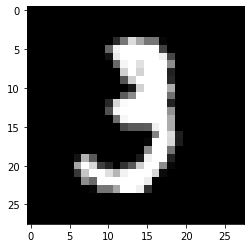

In [8]:
utils.show(data[10])

### Print the first entry of the label vector. The label is 5 telling you that this is the picture of a five.

In [9]:
print(label[0])

tensor(5)


### Display picture 20 of the dataset and print its label

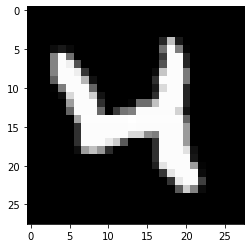

tensor(4)


In [10]:
utils.show(data[20])
print(label[20])

### Print the label corresponding to picture 10,000  10,001 10,002  10,003 and 10,004. So you need to extract 5 entries starting from entry 10,000.

In [11]:
print(label[10000:10005])

tensor([3, 8, 7, 9, 9])


### Display the two pictures that have label 9

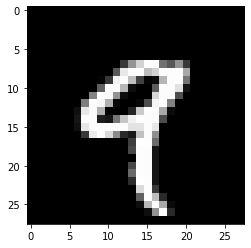

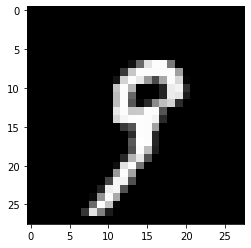

In [12]:
imgs = data[torch.nonzero(label==9, as_tuple=True)[0][:2]]
for img in imgs:
    utils.show(img)

### Lets now play with the CIFAR data set. These are RGB pictures

In [13]:
from utils import check_cifar_dataset_exists
data_path=check_cifar_dataset_exists()

data=torch.load(data_path+'cifar/train_data.pt')
label=torch.load(data_path+'cifar/train_label.pt')

### Find the size of these two tensors. How many pictures? How many pixels? Note that it is a 4-dimensional Tensor. Dimension 0 gives you the index of the picture, dimension 1 gives you the chanel (R, G or B) and the last two dimension gives you the pixel location.

In [14]:
print(data.size())

torch.Size([50000, 3, 32, 32])


### Extract the first picture (a 3 x 32 x 32 Tensor) and check its size.

In [15]:
print(data[0].size())

torch.Size([3, 32, 32])


### Display picture 7, 40 and 100 of the data set with utils.show() and print its label. For CIFAR, the label are:
0) Airplane  
1) Automobile   
2) Bird   
3) Cat   
4) Deer   
5) Dog    
6) Frog  
7) Horse   
8) Ship    
9) Truck

For example, a picture of a dog will have label 5.

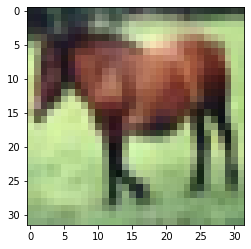

tensor(7)


In [16]:
utils.show(data[7])
print(label[7])